# parameters for Normal distribution

- mu(mean)-->0
- std(sigma)-->1

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import kurtosis,skew




# defining normal distribution parameters

mu=0
sigma=1


# generate the data points.
x=np.linspace(mu-4*sigma,mu+4*sigma,1000)
pdf=stats.norm.pdf(x,loc=mu,scale=sigma)
cdf=stats.norm.cdf(x,loc=mu,scale=sigma)

Text(0, 0.5, 'pdf')

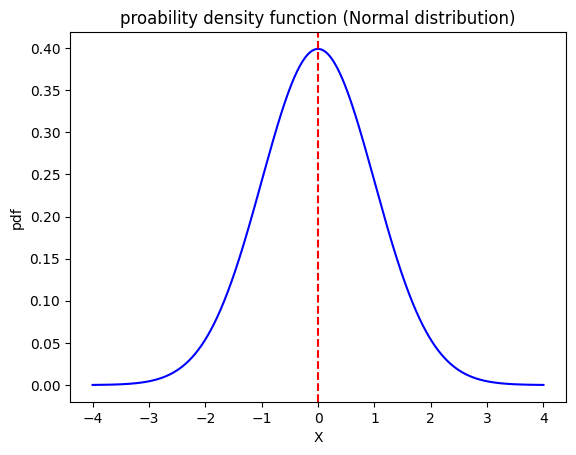

In [2]:
#plot for PDF
import seaborn as sns
import matplotlib.pyplot as plt


plt.plot(x, pdf,color="blue",label="PDF")
plt.axvline(mu,color="red",linestyle="--",label="Mean")
plt.title("proability density function (Normal distribution)")
plt.xlabel("X")
plt.ylabel("pdf")

Text(0, 0.5, 'CDF')

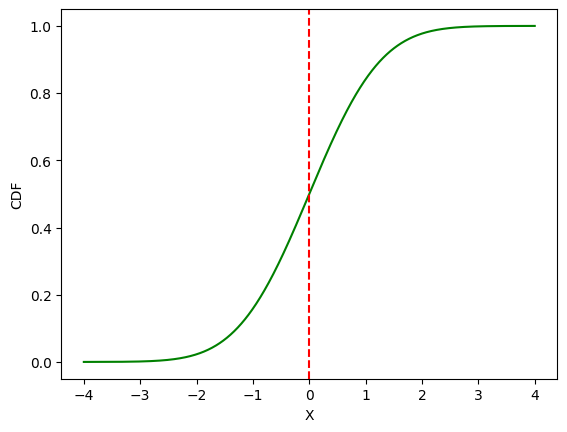

In [3]:
# plotting CDF:

plt.plot(x,cdf,color="green",label="cdf")
plt.axvline(mu,color="red",linestyle="--",label="Mean")
plt.xlabel("X")
plt.ylabel("CDF")

# Practical implementation over dataset:

In [4]:
iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
#extract the variable (Sepal width)
sepal_width=iris["sepal_width"]
sepal_width.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

## Does the distribution of sepal width follow a normal pattern?

In [6]:
# calculate Mean,Median and std:

mean=np.mean(sepal_width)
median=np.median(sepal_width)
std=np.std(sepal_width)


# skewness and kurtosis

d_skewness=skew(sepal_width)
d_kurtosis=kurtosis(sepal_width)





In [7]:
# emperical percentages:

one_std=((sepal_width>=mean-std)&(sepal_width<=mean+std)).sum()/len(sepal_width)*100
two_std=((sepal_width>=mean-2*std)&(sepal_width<=mean+2*std)).sum()/len(sepal_width)*100
three_std=((sepal_width>=mean-3*std)&(sepal_width<=mean+3*std)).sum()/len(sepal_width)*100
three_std

99.33333333333333

In [8]:
two_std

96.66666666666667

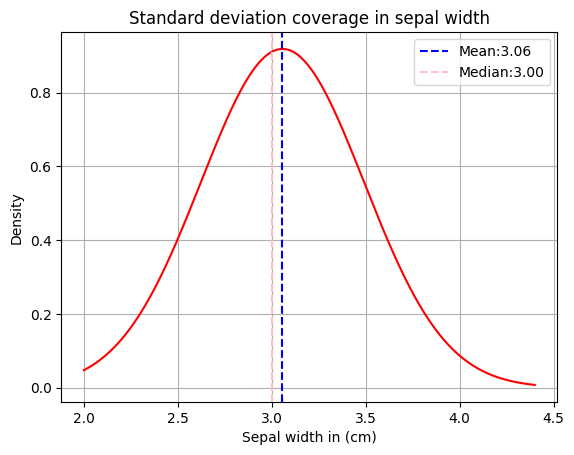

In [9]:
# histogram and normal pdf

x=np.linspace(sepal_width.min(),sepal_width.max(),1000)
pdf=stats.norm.pdf(x,loc=mean,scale=std)


plt.plot(x,pdf,color="red")
plt.axvline(mean,color="blue",linestyle="--",label=f"Mean:{mean:.2f}")
plt.axvline(median,color="pink",linestyle="--",label=f"Median:{median:.2f}")
plt.xlabel("Sepal width in (cm)")
plt.ylabel("Density")
plt.title("Standard deviation coverage in sepal width")
plt.grid()
plt.legend()

# What is the probability of observing sepal widths below a value 3.5 cm?

In [10]:
sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [11]:
cdf_value=stats.norm.cdf(3.5,loc=mean,scale=std)
cdf_value

0.8458995497782569

# what is the probability of observing sepal width above 3.5cm?

In [12]:
from scipy.stats import norm

In [13]:
val=1-norm.cdf(3.5,loc=mean,scale=std)
val

0.15410045022174312